<h3>RRN_Network (Predicting Stock Prices-Basic)</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h4>Importing the Dataset</h4>

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

<h4>Scaling the Dataset</h4>

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

<h4>Creating the dataset for Time Series</h4>

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

<h3>Importing the modules for Rnn Builder</h3>

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

<h3>Neural Network</h3>

In [7]:
regressor = Sequential()

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 150, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 150,return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0439
Epoch 2/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [===========================

1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 93/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 95/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0014


<h4>Importing Actual Prices</h4>

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

<h4>Creation of Testing set According to resgressor input</h4>

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [19]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<h2>Comparision of actual and predicted price</h2>

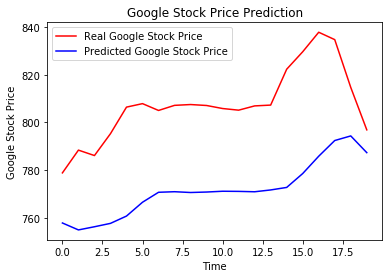

In [20]:
%matplotlib inline
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()